In [58]:
import warnings 
warnings.filterwarnings('ignore') 

## 1. Imports:

Importaremos o TensorFlow e outras bibliotecas necessárias. Keras é uma API de alto nível para redes neurais que roda em cima do TensorFlow, facilitando a construção de modelos de aprendizado de máquina.

In [62]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

## 2. Caminhos utilizados no fluxo

In [60]:
path = '/home/murilo/workspace/tcc/tcc/python_model/database'

x_train_path = f'{path}/x_train.csv'
y_train_path = f'{path}/y_train.csv'
x_test_path = f'{path}/x_test.csv'
y_test_path = f'{path}/y_test.csv'

## 3. Carregando os arquivos

In [61]:
x_train = pd.read_csv(x_train_path)
y_train = pd.read_csv(y_train_path)
x_test = pd.read_csv(x_test_path)
y_test = pd.read_csv(y_test_path)

## 4. Construindo o modelo

Para a rede neural, vamos usar uma arquitetura simples mas eficaz para este tipo de tarefa de regressão:

 - Camada de Entrada: Correspondente ao número de variáveis de entrada (Na e K).
 - Camadas Ocultas: Várias camadas ocultas com uma quantidade moderada de neurônios para capturar a complexidade nos dados.
 - Camada de Saída: Uma única unidade sem função de ativação para uma tarefa de regressão.

In [63]:
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'), # Camada oculta com 128 neurônios
    Dense(64, activation='relu'),                                   # Segunda camada oculta com 64 neurônios
    Dense(1, activation='linear')                                   # Camada de saída
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()])

In [67]:
# import keras

# keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

- Número de Neurônios: Começamos com mais neurônios nas primeiras camadas e reduzimos nas subsequentes. Essa "forma de funil" ajuda na aprendizagem de representações mais abstratas nos primeiros estágios e em refinar as predições nos estágios finais.
- Função de Ativação 'ReLU': A função ReLU é comumente usada por ser eficaz em adicionar não-linearidades ao modelo, ajudando a resolver problemas de regressão que não são facilmente solucionáveis com uma abordagem linear.
- Camada de Saída: Utilizamos uma função de ativação linear que é comumente utilizada para problemas de regressão

### 4.1. treinando o modelo

In [73]:
history = model.fit(x_train, y_train, epochs=100, validation_split = 0.2, batch_size=10, verbose=0)

### 4.2. descrição do modelo

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


### 4.3. Salvando o modelo

In [76]:
# model.save("python_model.h5")

### 4.4. Métricas do modelo

In [87]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
medae = median_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("MEDAE:", medae)
print("R²:", r2)

2/2 [==============================] - 0s 2ms/step
MSE: 0.03406967624370865
MAE: 0.13253899328129368
MAPE: 0.3870357703375928
MEDAE: 0.09869324855307443
R²: 0.9628612051192571


In [84]:
history_dict = history.history

# df_metrics = pd.DataFrame({
#     'Épocas': range(1, len(history_dict['loss']) + 1),
#     'Perda de Treinamento': history_dict['loss'],
#     'Perda de Validação': history_dict['val_loss'],
#     'MSE de Treinamento': history_dict['mean_squared_error'],
#     'MSE de Validação': history_dict['val_mean_squared_error'],
#     'MAE de Treinamento': history_dict['mean_absolute_error'],
#     'MAE de Validação': history_dict['val_mean_absolute_error'],
#     'MAPE de Treinamento': history_dict['mean_absolute_percentage_error'],
#     'MAPE de Validação': history_dict['val_mean_absolute_percentage_error'],
# })

# sns.set_theme(style="whitegrid")

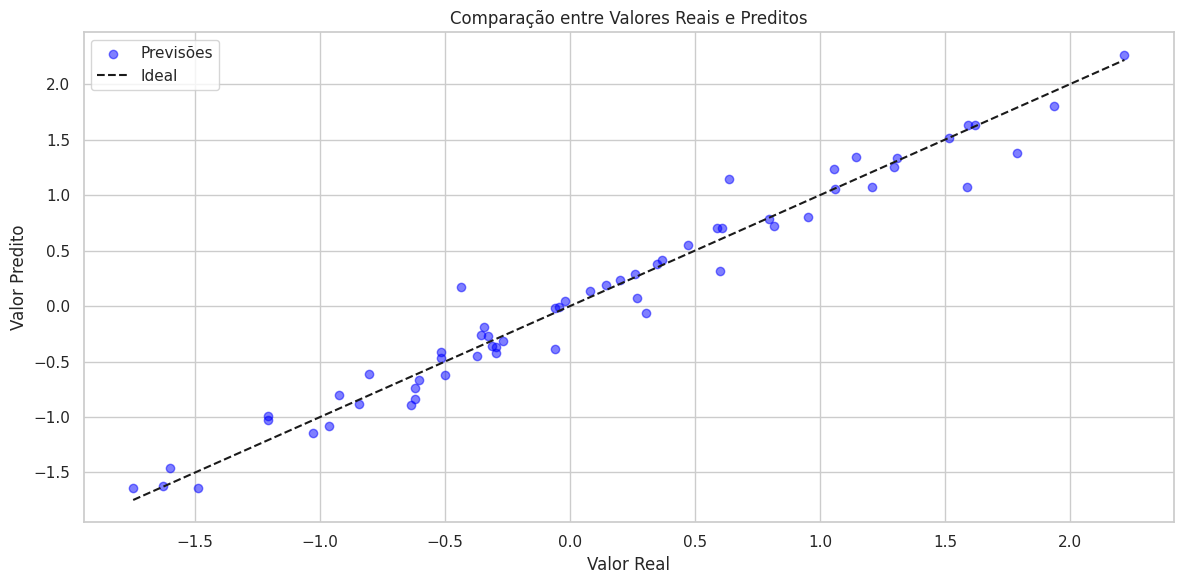

In [100]:
output = predictions.flatten()
real_values = y_test.iloc[:, 0].values

plt.figure(figsize=(12, 6))
plt.scatter(real_values, output, color='blue', alpha=0.5, label='Previsões')
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], 'k--', label='Ideal')


plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()